In [235]:
import tensorflow 
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Model

from keras.preprocessing import image

import numpy as np 

In [236]:
# import vgg16
from keras.applications.vgg16 import VGG16



In [237]:
# load the model
model=VGG16()

In [238]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [239]:
for i in range (len(model.layers)):
    # check the conv layers
    if 'conv' not in model.layers[i].name:
        continue
    # get filter weights and bias 
    filter,bias=model.layers[i].get_weights()
    print('layers_number ',i,model.layers[i].name,filter.shape)


layers_number  1 block1_conv1 (3, 3, 3, 64)
layers_number  2 block1_conv2 (3, 3, 64, 64)
layers_number  4 block2_conv1 (3, 3, 64, 128)
layers_number  5 block2_conv2 (3, 3, 128, 128)
layers_number  7 block3_conv1 (3, 3, 128, 256)
layers_number  8 block3_conv2 (3, 3, 256, 256)
layers_number  9 block3_conv3 (3, 3, 256, 256)
layers_number  11 block4_conv1 (3, 3, 256, 512)
layers_number  12 block4_conv2 (3, 3, 512, 512)
layers_number  13 block4_conv3 (3, 3, 512, 512)
layers_number  15 block5_conv1 (3, 3, 512, 512)
layers_number  16 block5_conv2 (3, 3, 512, 512)
layers_number  17 block5_conv3 (3, 3, 512, 512)


In [240]:
# retrieve weights from second hidden layers
filters,bias=model.layers[1].get_weights()

In [241]:
filters.shape

(3, 3, 3, 64)

In [242]:
# normalizing the filters values 0-1 so that we can visualize them 

fil_min,fil_max=filters.min(),filters.max()
filters=(filters-fil_min)/(fil_max-fil_min)

filters

array([[[[0.8601116 , 0.6161919 , 0.55114007, ..., 0.4212452 ,
          0.4828852 , 0.5304859 ],
         [0.9545779 , 0.5408773 , 0.6017826 , ..., 0.4582953 ,
          0.4846108 , 0.5538601 ],
         [0.89960235, 0.3896376 , 0.5539096 , ..., 0.42523453,
          0.4852669 , 0.5518304 ]],

        [[0.81635594, 0.65118545, 0.52590066, ..., 0.4087713 ,
          0.340725  , 0.47531587],
         [0.8683965 , 0.5615535 , 0.5647105 , ..., 0.44733417,
          0.2931476 , 0.46953422],
         [0.8437643 , 0.39145148, 0.5206881 , ..., 0.42896524,
          0.30857468, 0.4940327 ]],

        [[0.47662497, 0.63058364, 0.43417358, ..., 0.4150598 ,
          0.22949417, 0.28977698],
         [0.4609779 , 0.5572666 , 0.4450579 , ..., 0.4508793 ,
          0.12949093, 0.22478487],
         [0.4736674 , 0.40397066, 0.41671643, ..., 0.42346177,
          0.16341406, 0.27143562]]],


       [[[0.7392438 , 0.6404719 , 0.6507926 , ..., 0.43525034,
          0.810127  , 0.7901605 ],
         [0.

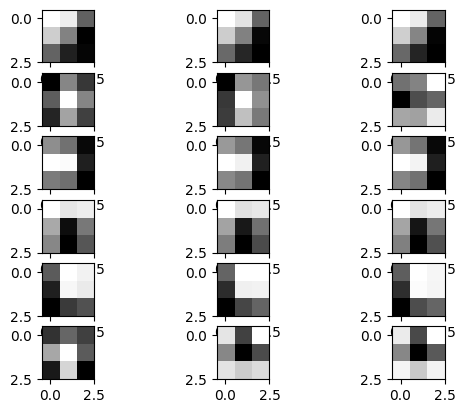

In [243]:
n_filter=6
ix=1

fig=plt.Figure(figsize=(15,15))
for i in range(n_filter):
    f=filters[:,:,:,i]
    for j in range(3):
        plt.subplot(n_filter,3,ix)
        plt.imshow(f[:,:,j],cmap='gray')
        ix+=1

plt.show()



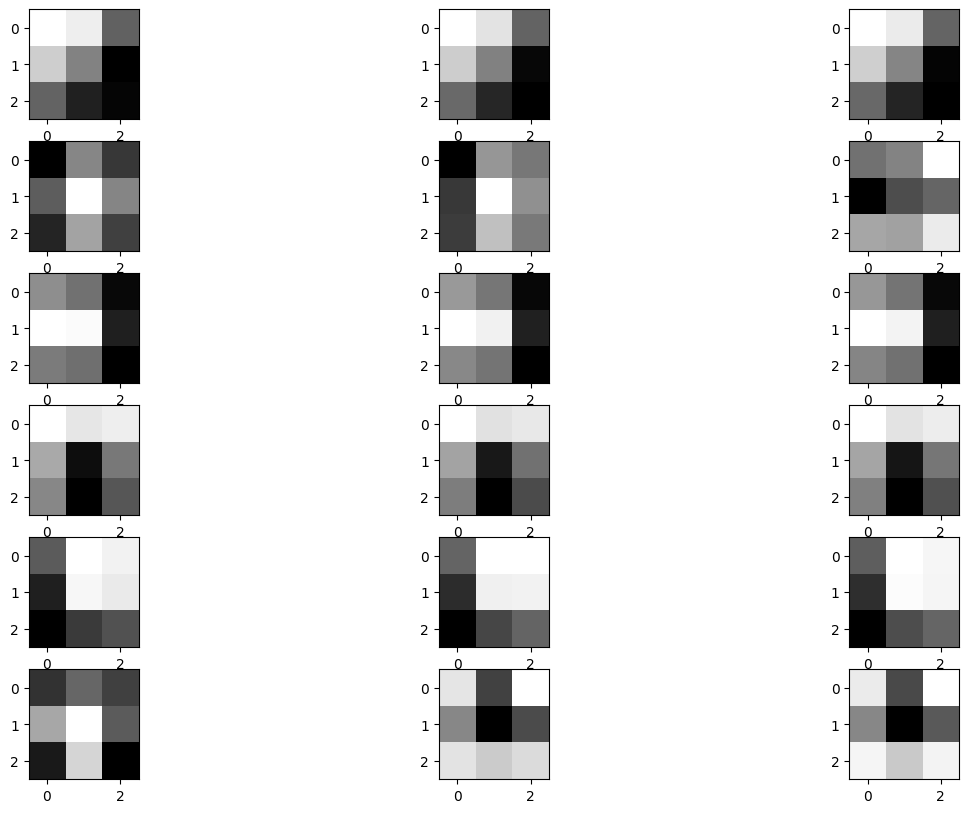

In [244]:
n_filters =6
ix=1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
pyplot.show()

In [245]:
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

In [246]:
# load img 
img=image.load_img(r'C:\Users\SDS\Pictures\rana3.jpg',target_size=(224,224))
img

# convert to  numpy array
img=image.img_to_array(img)

# expand dimensions so that it represents a single 'sample'
image = np.expand_dims(img, axis=0)





In [247]:
import numpy as np

# Assuming 'image' is assigned correctly elsewhere in your code

if isinstance(image, np.ndarray):
    # Proceed with preprocessing
    image_preprocessed = (image - image.min()) / (image.max() - image.min())
else:
    # Print an error message or take appropriate action
    print("Error: 'image' is not a NumPy array")

# Alternatively, if you're using a function for preprocessing
def preprocess_input_for_numerical_array(x):
    if isinstance(x, np.ndarray):
        return (x - x.min()) / (x.max() - x.min())
    else:
        raise ValueError("Input must be a NumPy array")

try:
    image_preprocessed = preprocess_input_for_numerical_array(image)
except ValueError as e:
    print(e)  # Print the error message


1/1 [==============================] - 0s 74ms/step


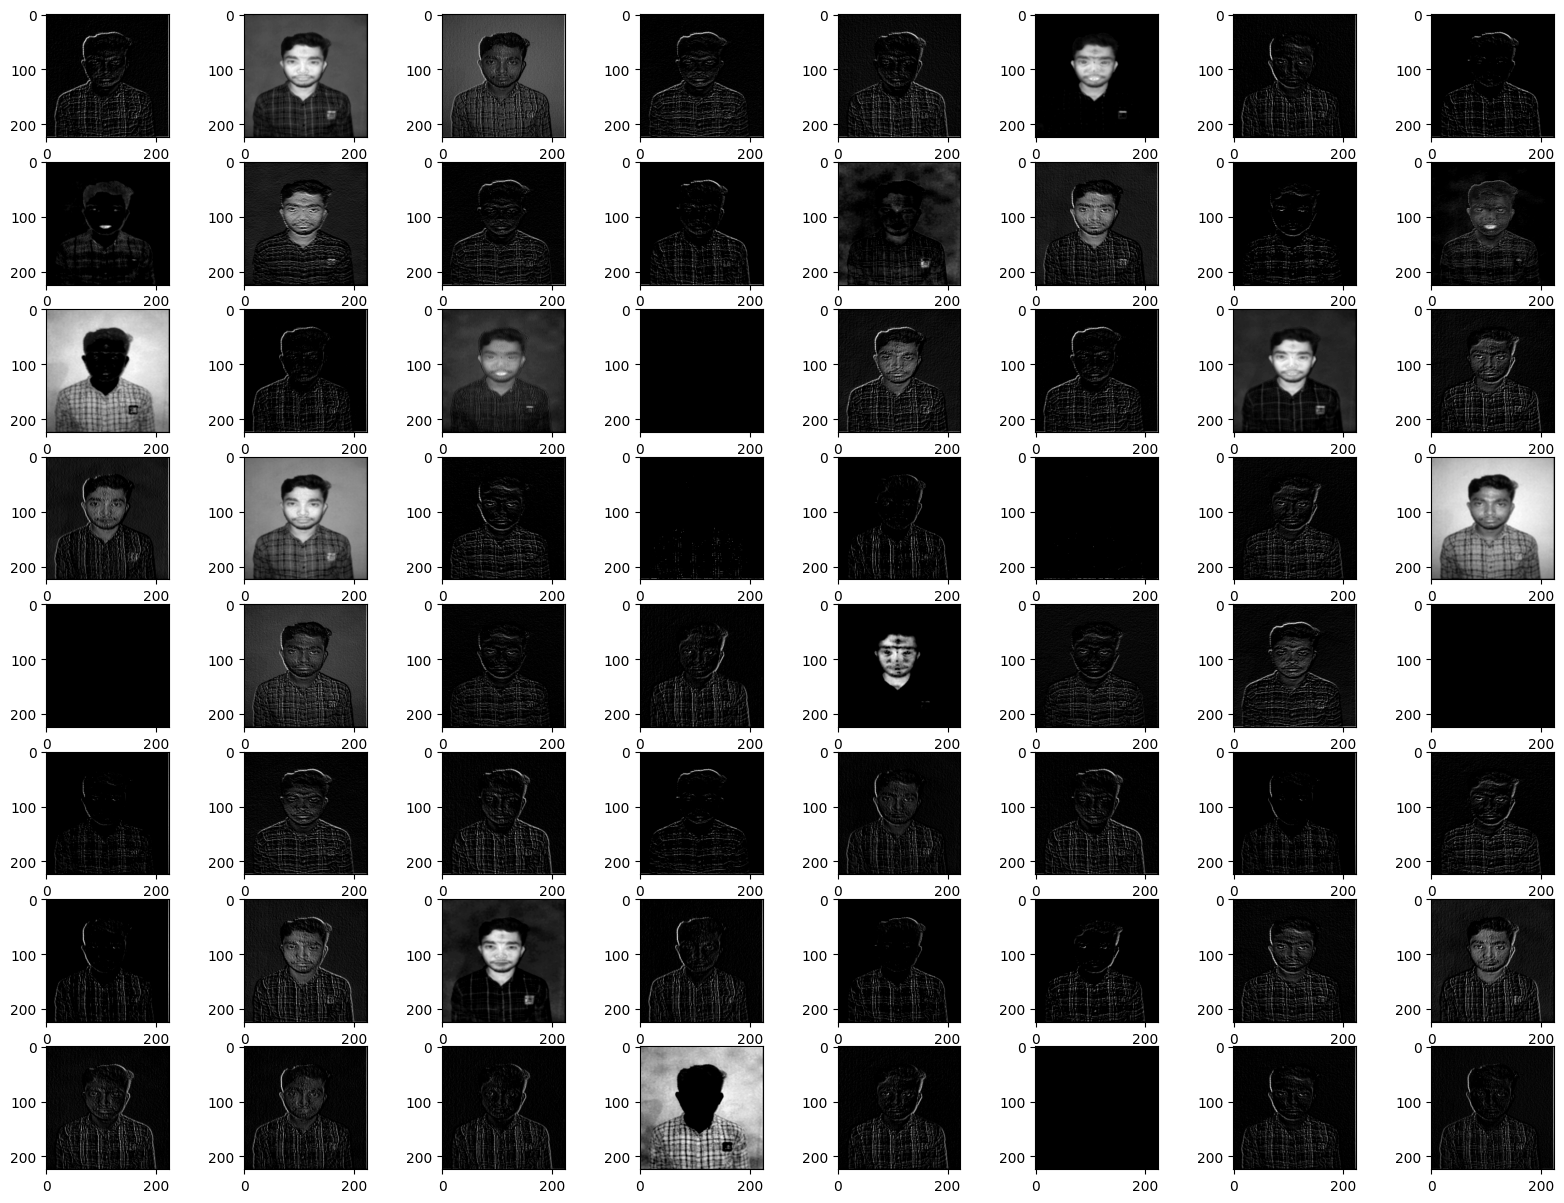

In [248]:
#calculating features_map
features = model.predict(image)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
plt.show()

In [249]:
model2 = VGG16()
layer_index = [ 2, 5 , 9]
outputs=[model2.layers[i].output for i in layer_index]

model=Model(inputs=model2.inputs,outputs=outputs)

Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (224, 224)
Slice shape: (22

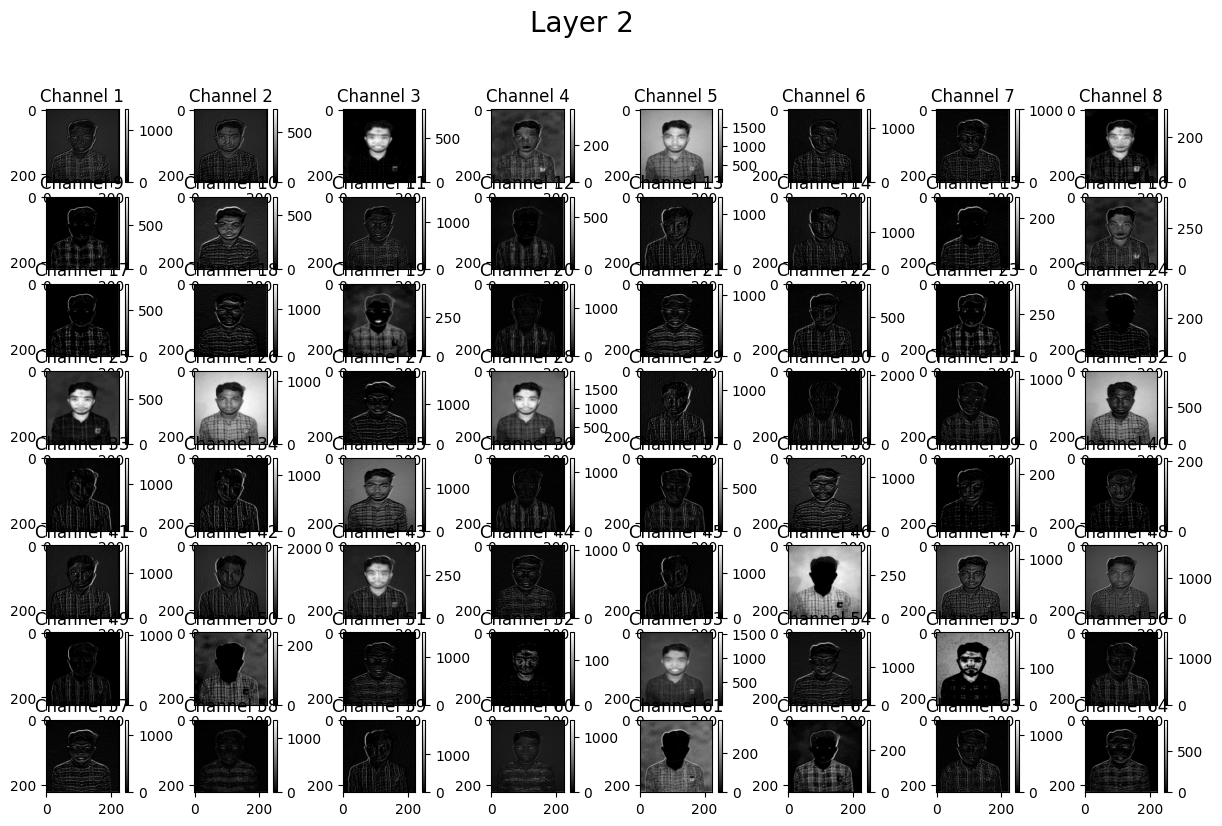

Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (112, 112)
Slice shape: (11

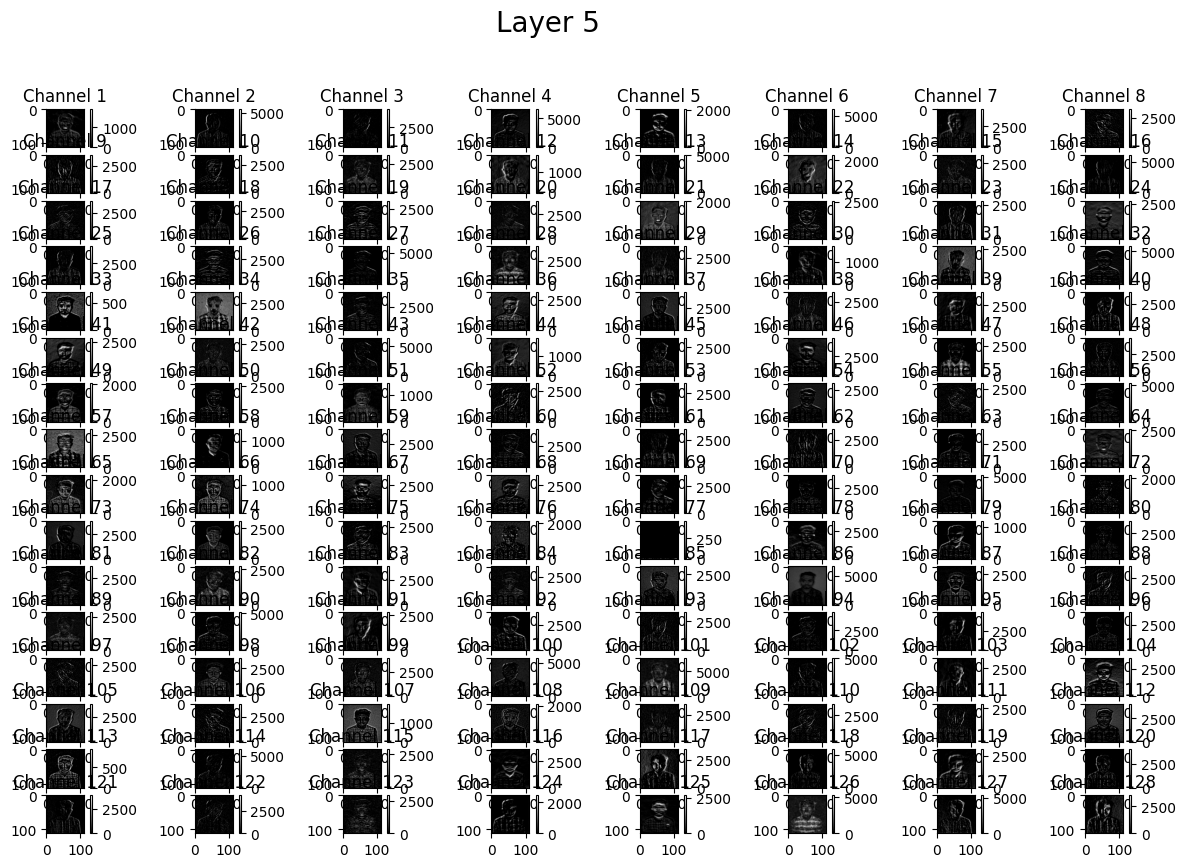

Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shape: (56, 56)
Slice shap

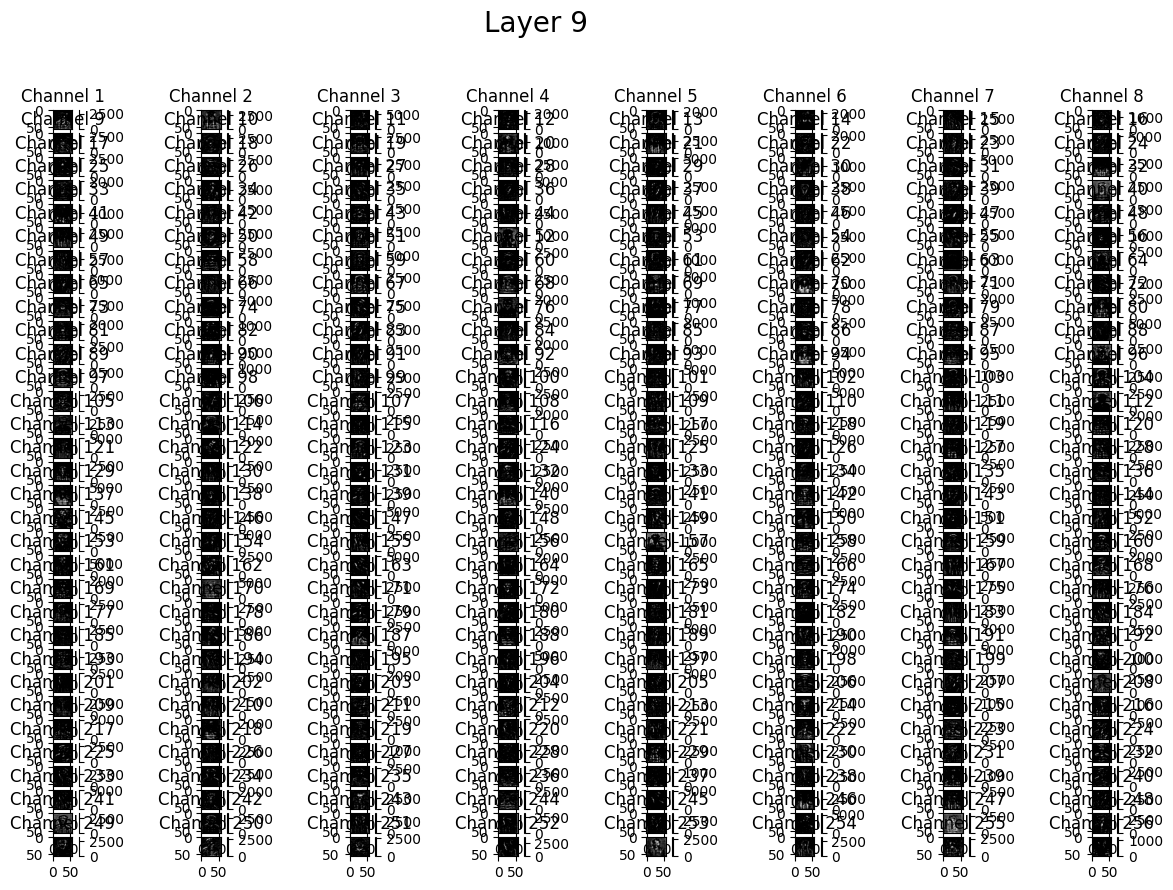

In [250]:
import matplotlib.pyplot as plt

# Assuming features_map contains the feature maps produced by model.predict(image)
# Assuming layer_index contains the indices of the layers whose feature maps you want to visualize

for i, famp in zip(layer_index, features_map):
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle('Layer {}'.format(i), fontsize=20)
    
    # Assuming famp is your 4-dimensional array
    num_channels = famp.shape[3]
    
    for j in range(num_channels):
        slice_data = famp[0, :, :, j]  # Extracting the j-th channel of the feature map
        print("Slice shape:", slice_data.shape)  # Check the shape of the slice
        # Display the slice along the channel dimension
        plt.subplot(num_channels // 8 + 1, 8, j + 1)  # Adjust subplot indices
        plt.imshow(slice_data, cmap='gray')
        plt.colorbar()  # Add colorbar for visualization
        plt.title(f"Channel {j + 1}")  # Add title with channel number

    plt.show()

